In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from PIL import Image as img_load
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# About The palmerpenguins Dataset

### <font color='cyan'>The palmerpenguins data contains size measurements<br> for three penguin species observed on three islands in<br> the Palmer Archipelago, Antarctica

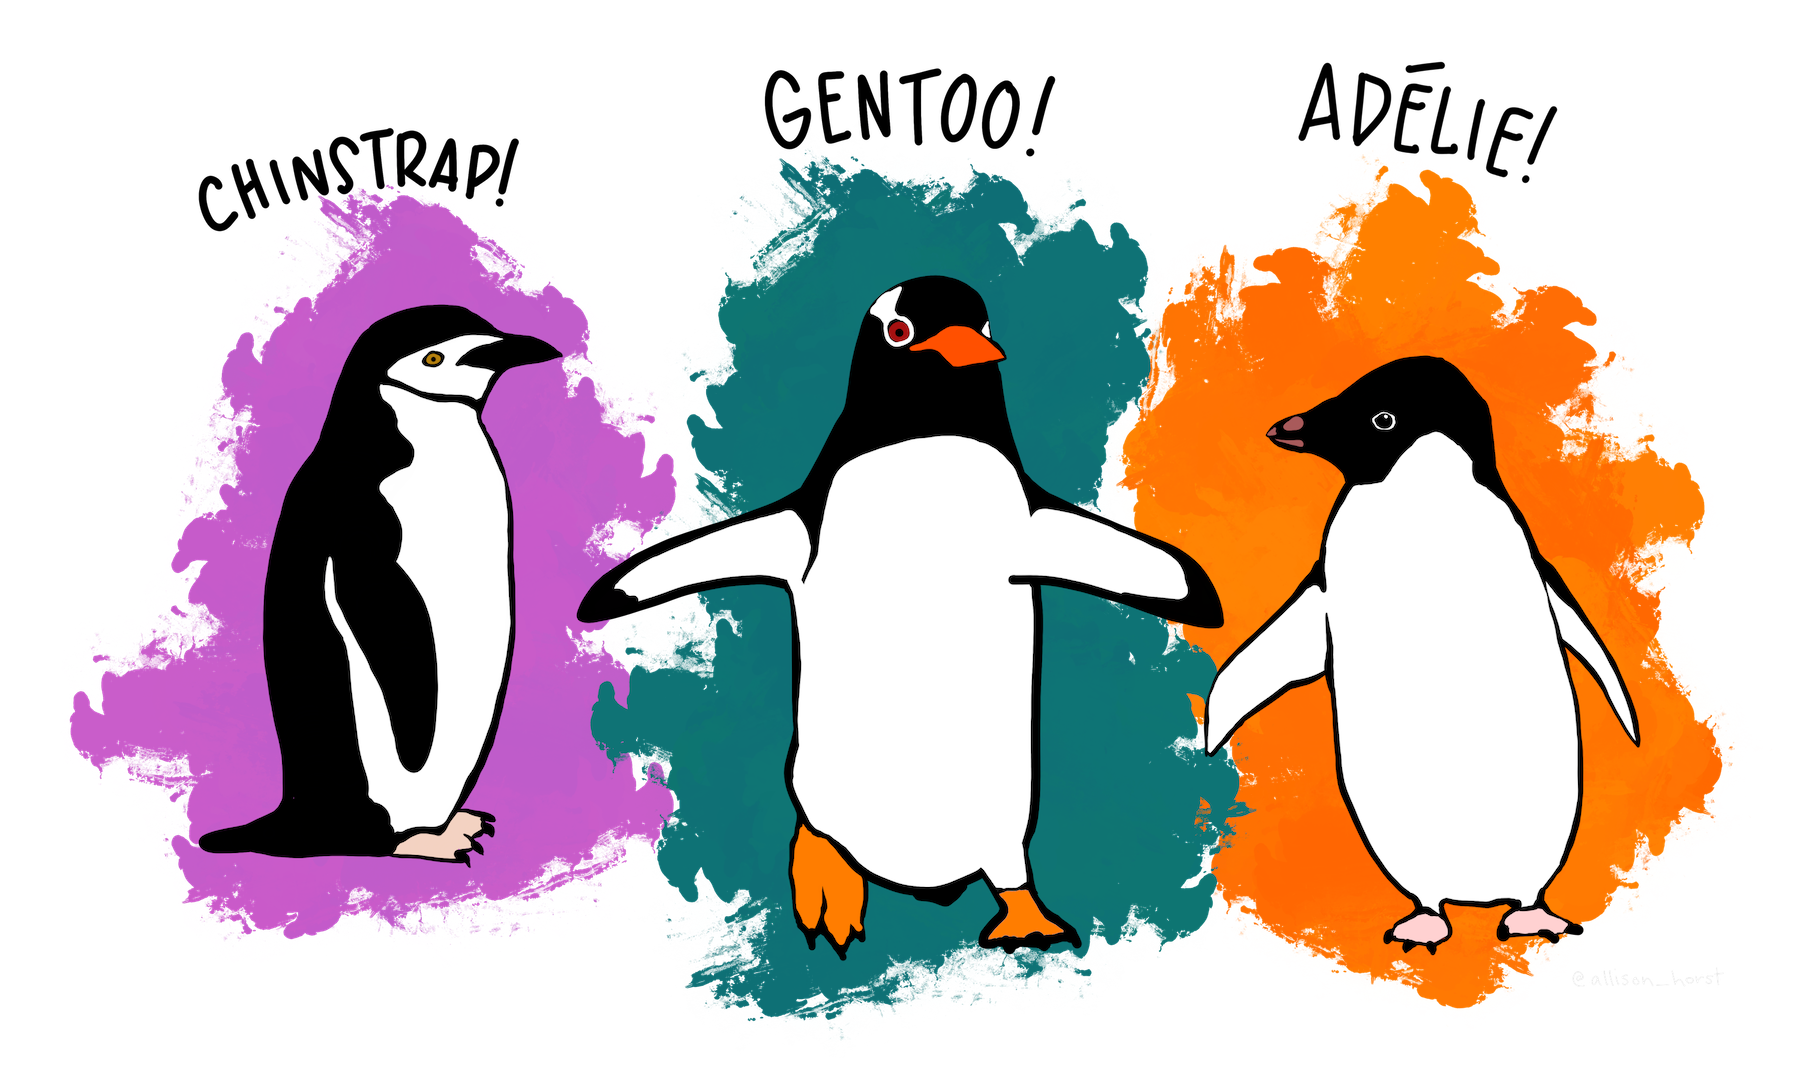

In [2]:
# Meet the superstars of the dataset
img_load.open('penguins_species.png')

- <font color='orange'>species:</font> penguin species (Chinstrap, Adélie, or Gentoo)
- <font color='orange'>culmen_length_mm:</font> culmen length (mm)
- <font color='orange'>culmen_depth_mm:</font> culmen depth (mm)
- <font color='orange'>flipper_length_mm:</font> flipper length (mm)
- <font color='orange'>body_mass_g:</font> body mass (g)
- <font color='orange'>island:</font> island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- <font color='orange'>sex:</font> penguin sex

In [3]:
penguins = pd.read_csv('Palmer Penguins Dataset/penguins_size.csv')

In [4]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Data Cleaning

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins[(penguins['culmen_length_mm'].isnull())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [7]:
# Since these null cols do not contain any extra info like new species or island, we can drop them
penguins=penguins[(penguins['culmen_length_mm'].notnull())]

In [8]:
penguins[(penguins['sex'].isnull())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [9]:
print('Sex count for Torgersen: ', penguins[(penguins['species']=='Adelie')]['sex'].value_counts())
print('\nSex count for Dream: ', penguins[(penguins['species']=='Gentoo')]['sex'].value_counts())
# Species is not the correct parameter to fill for null values for sex

Sex count for Torgersen:  sex
MALE      73
FEMALE    73
Name: count, dtype: int64

Sex count for Dream:  sex
MALE      61
FEMALE    58
.          1
Name: count, dtype: int64


In [10]:
print('Average culmen_length_mm for male penguins: ', penguins[(penguins['sex']=='MALE')]['culmen_length_mm'].mean())
print('Average culmen_length_mm for female penguins: ', penguins[(penguins['sex']=='FEMALE')]['culmen_length_mm'].mean())

print('Average culmen_depth_mm for male penguins: ', penguins[(penguins['sex']=='MALE')]['culmen_depth_mm'].mean())
print('Average culmen_depth_mm for female penguins: ', penguins[(penguins['sex']=='FEMALE')]['culmen_depth_mm'].mean())

print('Average flipper_length_mm for male penguins: ', penguins[(penguins['sex']=='MALE')]['flipper_length_mm'].mean())
print('Average flipper_length_mm for female penguins: ', penguins[(penguins['sex']=='FEMALE')]['flipper_length_mm'].mean())

Average culmen_length_mm for male penguins:  45.85476190476191
Average culmen_length_mm for female penguins:  42.096969696969694
Average culmen_depth_mm for male penguins:  17.89107142857143
Average culmen_depth_mm for female penguins:  16.425454545454546
Average flipper_length_mm for male penguins:  204.50595238095238
Average flipper_length_mm for female penguins:  197.36363636363637


In [11]:
# Filling the null values of sex with:
# Male : > 204 mm flipper_length
# Female : < 204 mm flipper_length
penguins.loc[(penguins['flipper_length_mm'] >= 204) & (penguins['sex'].isnull()), 'sex'] = 'MALE'
penguins.loc[(penguins['flipper_length_mm'] < 204) & (penguins['sex'].isnull()), 'sex'] = 'FEMALE'

In [12]:
# One-Hot Encoding sex column and island column
penguins_encoded = pd.get_dummies(penguins, columns=['sex', 'island'],)

In [13]:
penguins_encoded.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,False,False,True,False,False,True
1,Adelie,39.5,17.4,186.0,3800.0,False,True,False,False,False,True
2,Adelie,40.3,18.0,195.0,3250.0,False,True,False,False,False,True
4,Adelie,36.7,19.3,193.0,3450.0,False,True,False,False,False,True
5,Adelie,39.3,20.6,190.0,3650.0,False,False,True,False,False,True


# Data Visualization

<Axes: xlabel='species', ylabel='flipper_length_mm'>

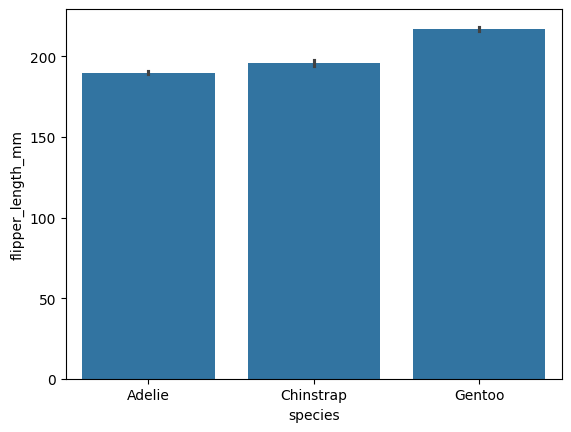

In [14]:
sns.barplot(x='species', y='flipper_length_mm', data=penguins)

<Axes: xlabel='species', ylabel='culmen_depth_mm'>

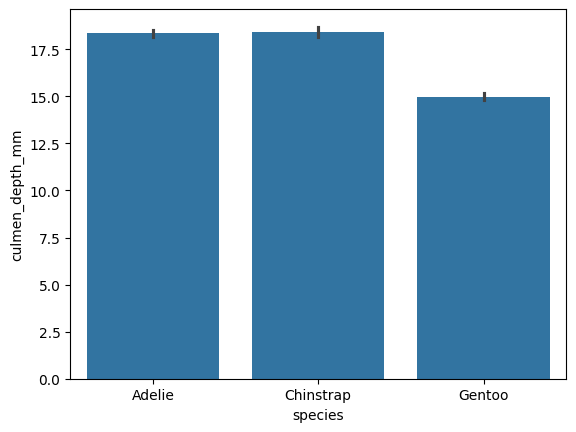

In [15]:
sns.barplot(x='species', y='culmen_depth_mm', data=penguins)

<Axes: xlabel='species', ylabel='culmen_length_mm'>

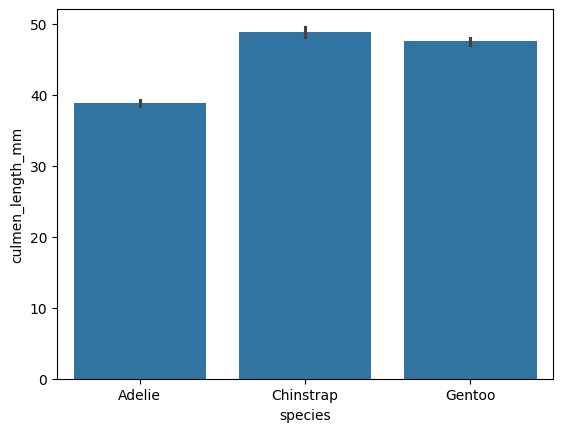

In [16]:
sns.barplot(x='species', y='culmen_length_mm', data=penguins)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

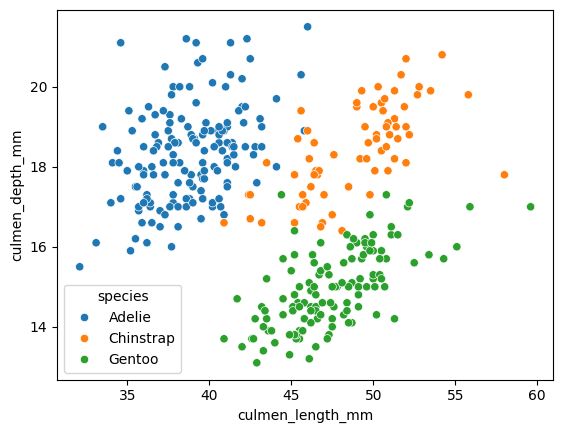

In [17]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=penguins)

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

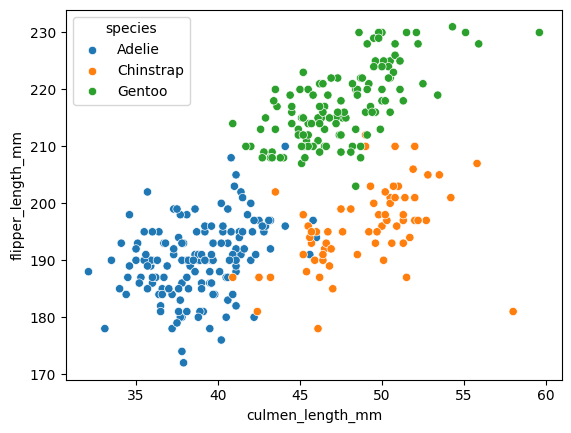

In [18]:
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm', hue='species', data=penguins)

<Axes: xlabel='culmen_depth_mm', ylabel='flipper_length_mm'>

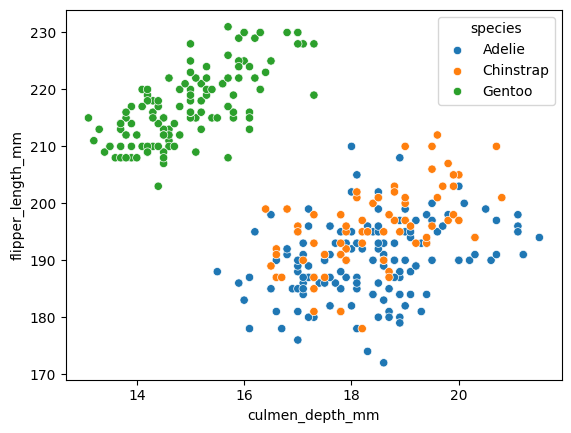

In [19]:
sns.scatterplot(x='culmen_depth_mm', y='flipper_length_mm', hue='species', data=penguins)

# Spiltting Data into Training and Testing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(penguins_encoded.drop(columns='species'), penguins_encoded['species'], test_size=0.2, random_state=42)

# Trying Differnet Models

### <font color='orange'>1. Decision Tree Classifier

In [57]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [58]:
dt.score(X_test, y_test)

0.9710144927536232

In [59]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        35
   Chinstrap       0.92      1.00      0.96        12
      Gentoo       0.96      1.00      0.98        22

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



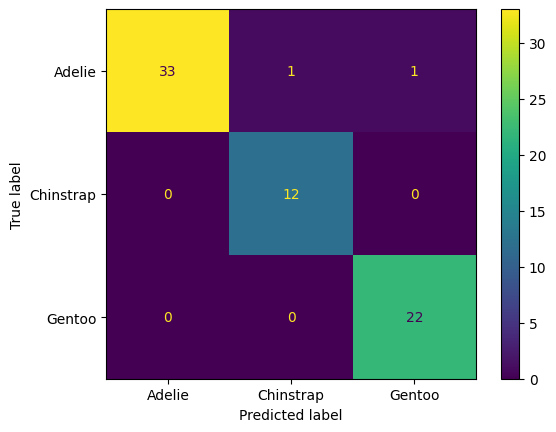

In [60]:
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(conf_mat_dt, display_labels=dt.classes_).plot()

### <font color='orange'>2. Logistic Regression

In [63]:
lr = LogisticRegression(random_state=100, max_iter=400)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=400, random_state=100)

In [64]:
lr.score(X_test, y_test)

1.0

In [65]:
y_pred_lr = lr.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred_lr ))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        35
   Chinstrap       1.00      1.00      1.00        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



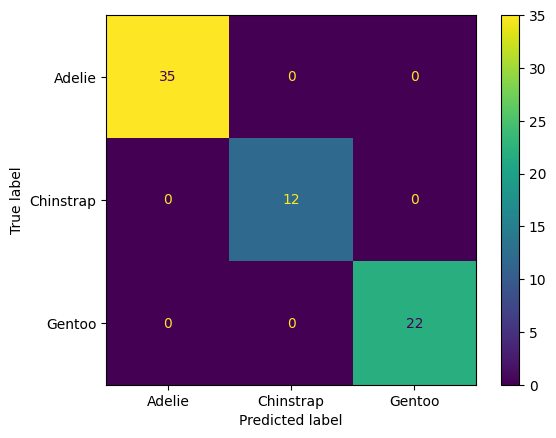

In [67]:
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(conf_mat_lr, display_labels=lr.classes_).plot()

### <font color='orange'>3. Naive Bayes

In [68]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred_nb = NB.predict(X_test)
NB.score(X_test, y_test)

0.855072463768116

In [70]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

      Adelie       1.00      0.71      0.83        35
   Chinstrap       0.57      1.00      0.73        12
      Gentoo       0.96      1.00      0.98        22

    accuracy                           0.86        69
   macro avg       0.84      0.90      0.85        69
weighted avg       0.91      0.86      0.86        69



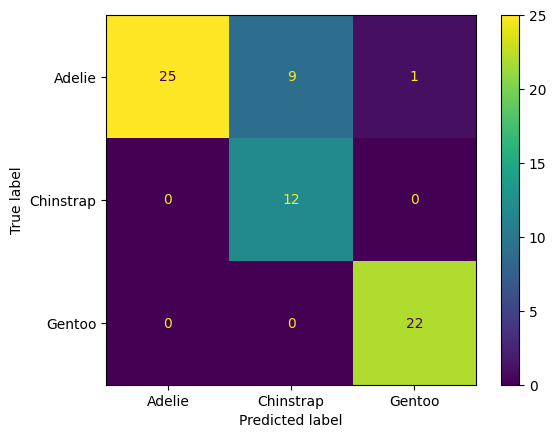

In [71]:
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(conf_mat_nb, display_labels=NB.classes_).plot()

### <font color='orange'>4. K-Nearest Neighbors

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
knn.score(X_test, y_test)

0.8840579710144928

In [74]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

      Adelie       0.89      0.89      0.89        35
   Chinstrap       0.73      0.67      0.70        12
      Gentoo       0.96      1.00      0.98        22

    accuracy                           0.88        69
   macro avg       0.86      0.85      0.85        69
weighted avg       0.88      0.88      0.88        69



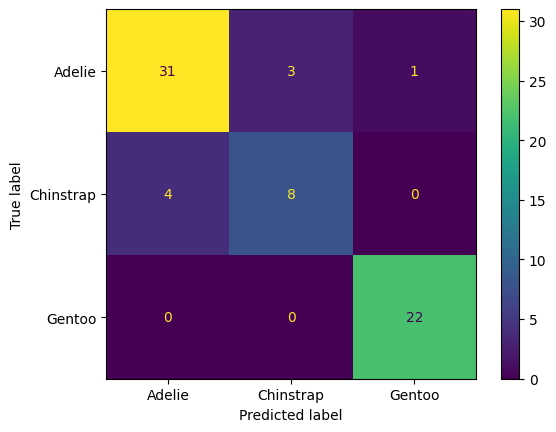

In [75]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(conf_mat_knn, display_labels=knn.classes_).plot()

### <font color='orange'>5. Random Forest Classifier 

In [76]:
# Figuring our best n_estimators
error_rate = []
for i in range(1, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i, random_state=42)
    rfc.fit(X_train, y_train)
    error_rate.append(rfc.score(X_test, y_test))

<Axes: >

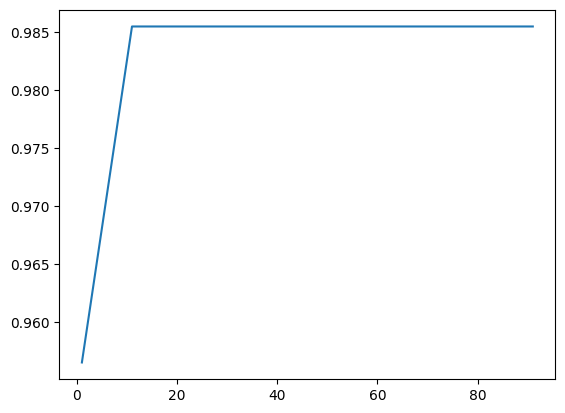

In [39]:
sns.lineplot(x=range(1, 100, 10), y=error_rate)

In [40]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [41]:
rfc.score(X_test, y_test)*100

98.55072463768117

In [42]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        35
   Chinstrap       0.92      1.00      0.96        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



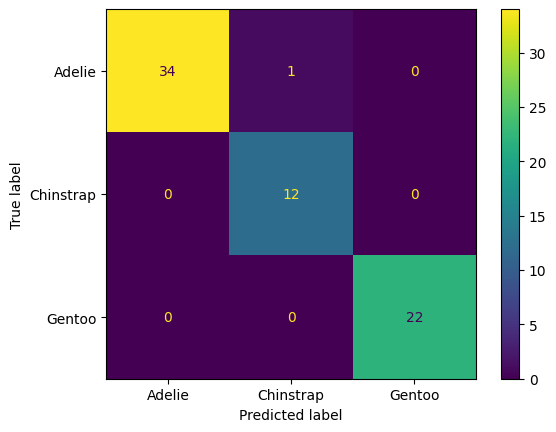

In [43]:
conf_mat_rfc = confusion_matrix(y_test, y_pred_rfc)
ConfusionMatrixDisplay(conf_mat_rfc, display_labels=['Adelie', 'Chinstrap', 'Gentoo']).plot()

### <font color='orange'>6. Support Vector Machine

In [44]:
# best gamma, C for SVC
param_grid = {'C': [0.1, 1, 3, 10, 20],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [45]:
svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [46]:
svc.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.436 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.418 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.418 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.426 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.436 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.418 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.418 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.426 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.426 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.436 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 10, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
svc.best_params_

{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}

In [48]:
y_pred_svc = svc.predict(X_test)
svc.score(X_test, y_test)

0.9420289855072463

In [49]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

      Adelie       0.90      1.00      0.95        35
   Chinstrap       1.00      0.67      0.80        12
      Gentoo       1.00      1.00      1.00        22

    accuracy                           0.94        69
   macro avg       0.97      0.89      0.92        69
weighted avg       0.95      0.94      0.94        69



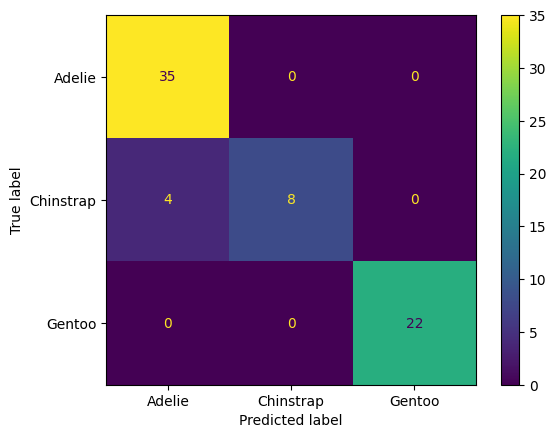

In [50]:
conf_mat_svc = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(conf_mat_svc, display_labels=['Adelie', 'Chinstrap', 'Gentoo']).plot()

### <font color='orange'>7. K means Clustering</font> (on the basis of culmen_length_mm and culmen_depth_mm)

In [51]:
# Create an elbow plot to find the best number of cluster
X = penguins_encoded[['culmen_length_mm', 'culmen_depth_mm']].to_numpy()
wcse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcse.append(kmeans.inertia_)

<Axes: >

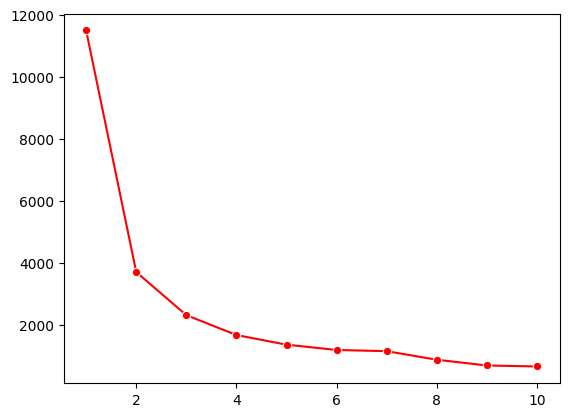

In [52]:
sns.lineplot(x=range(1, 11), y=wcse, marker='o', color='red')

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [54]:
kmeans.fit(penguins[['culmen_length_mm', 'culmen_depth_mm']])

KMeans(n_clusters=3, n_init=10, random_state=42)

In [55]:
y = kmeans.predict(penguins[['culmen_length_mm', 'culmen_depth_mm']])

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

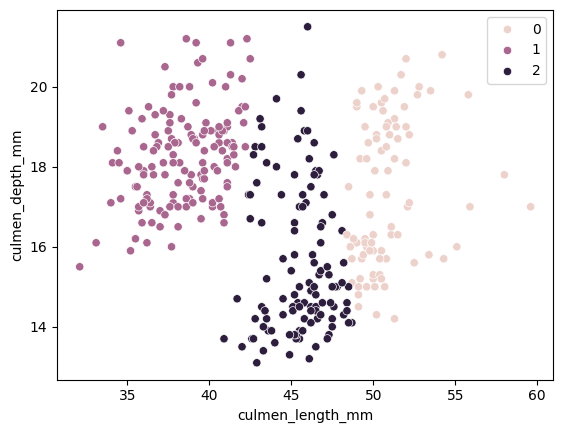

In [56]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue=y, data=penguins)